# **Project 1: Exploring Broadway Show Statistics**

Data collected by https://www.broadwayleague.com from reporting broadway theatres about performances (attendance, total gross, type of show, etc.) grouped by weeklong periods 1990-2016.

Which tend to perform better - plays or musicals?

# **EDA**

In [2]:
import numpy as np
import pandas as pd

shows = pd.read_csv("broadway.csv")
print(shows.shape)
shows.head()

(31296, 12)


,Date.Day,Date.Full,Date.Month,Date.Year,Show.Name,Show.Theatre,Show.Type,Statistics.Attendance,Statistics.Capacity,Statistics.Gross,Statistics.Gross Potential,Statistics.Performances
0,26,8/26/1990,8,1990,Tru,Booth,Play,5500,88,134456,0,8
1,24,3/24/1991,3,1991,Miss Saigon,Broadway,Musical,1737,100,100647,0,0
2,31,3/31/1991,3,1991,Miss Saigon,Broadway,Musical,12160,100,634424,0,0
3,7,4/7/1991,4,1991,Miss Saigon,Broadway,Musical,13921,100,713353,0,0
4,14,4/14/1991,4,1991,Miss Saigon,Broadway,Musical,10973,90,573981,0,4


In [3]:
np.sum(shows.isna())

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,0
Date.Day,0
Date.Full,0
Date.Month,0
Date.Year,0
Show.Name,0
Show.Theatre,0
Show.Type,0
Statistics.Attendance,0
Statistics.Capacity,0
Statistics.Gross,0


In [4]:
shows['Date.Full'] = pd.to_datetime(shows['Date.Full'])
shows.head()

,Date.Day,Date.Full,Date.Month,Date.Year,Show.Name,Show.Theatre,Show.Type,Statistics.Attendance,Statistics.Capacity,Statistics.Gross,Statistics.Gross Potential,Statistics.Performances
0,26,1990-08-26,8,1990,Tru,Booth,Play,5500,88,134456,0,8
1,24,1991-03-24,3,1991,Miss Saigon,Broadway,Musical,1737,100,100647,0,0
2,31,1991-03-31,3,1991,Miss Saigon,Broadway,Musical,12160,100,634424,0,0
3,7,1991-04-07,4,1991,Miss Saigon,Broadway,Musical,13921,100,713353,0,0
4,14,1991-04-14,4,1991,Miss Saigon,Broadway,Musical,10973,90,573981,0,4


# **Visualizations**

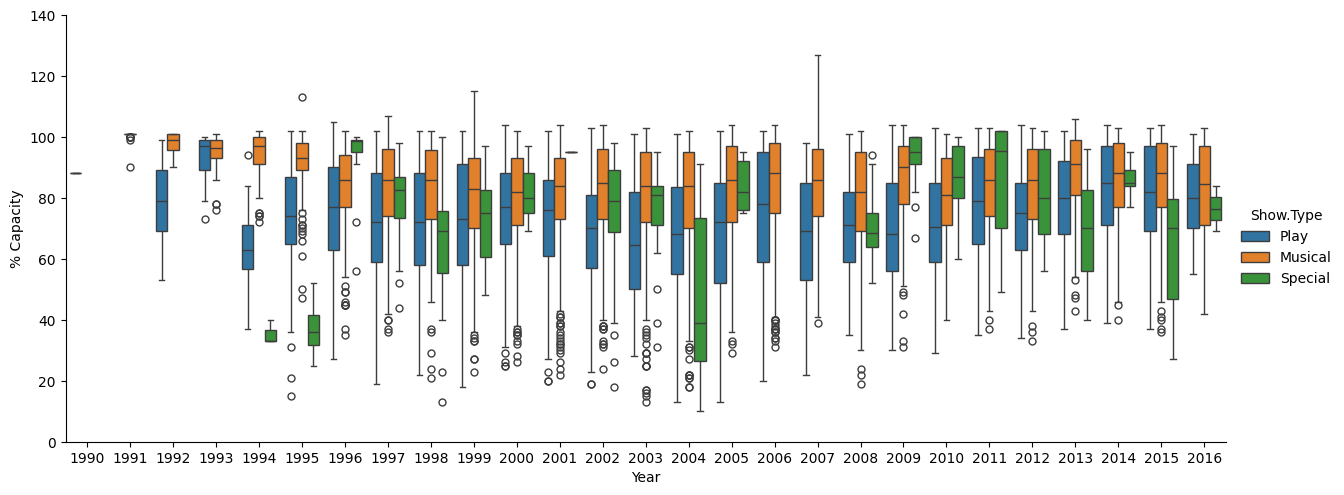

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.catplot(data=shows, x="Date.Year", y="Statistics.Capacity", hue="Show.Type", kind="box", aspect=2.5)
plt.ylim(0,140)
plt.xlabel("Year"); plt.ylabel("% Capacity")
plt.show()

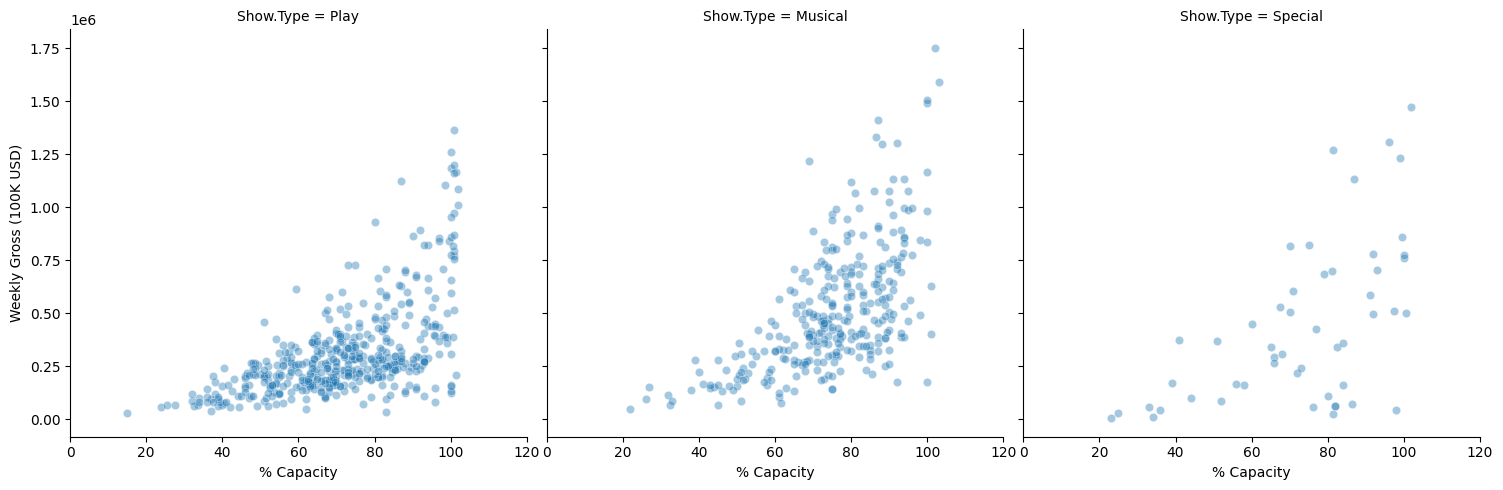

In [6]:
showsGrouped = shows[['Show.Name', 'Statistics.Capacity', 'Statistics.Gross', 'Show.Type']].groupby([ 'Show.Name', 'Show.Type']).agg("median")

g = sns.relplot(data=showsGrouped, x='Statistics.Capacity', y='Statistics.Gross', col='Show.Type', alpha = .4)
plt.xlim(0,120);
g.set_axis_labels("% Capacity", "Weekly Gross (100K USD)")
#g.set_yticklabels()
plt.show()

# **Bootstrapping**

In [7]:
plays = shows[shows['Show.Type'] == "Play"]
plays = np.array(plays['Statistics.Capacity'])
np.median(plays)

np.float64(74.0)

In [8]:
boot_meds = []
sample10 = np.random.choice(plays, int(plays.size/10))
for i in range(10000):
  boot_sample = np.random.choice(sample10, plays.size, True)
  boot_meds.append(np.median(boot_sample))

np.mean(boot_meds)

np.float64(74.04965)

In [11]:
ci = np.percentile(boot_meds, [2.5, 97.5])
ci

array([74., 75.])

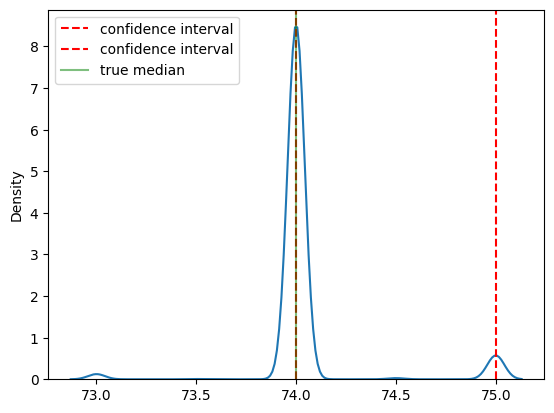

In [27]:
sns.kdeplot(boot_meds)
for endpoint in ci:
    plt.axvline(endpoint, color='red', ls = '--', label = 'confidence interval')
plt.axvline(float(np.median(plays)), color = 'green', label = 'true median', alpha = 0.5)
plt.legend()